In [117]:
import pandas as pd
import seaborn as sns
import math
import re
import numpy as np

In [2]:
data = pd.read_csv('../Data/train.csv')

In [42]:
data.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [89]:
## let's check the % of data that has all or some of the fields
counts = pd.DataFrame([{"Class": x, "Count":data[data[x]==1].shape[0]} for x in data.columns[2:]])

In [90]:
counts

,Class,Count
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


[Text(0, 0, '15294'),
 Text(0, 0, '1595'),
 Text(0, 0, '8449'),
 Text(0, 0, '478'),
 Text(0, 0, '7877'),
 Text(0, 0, '1405')]

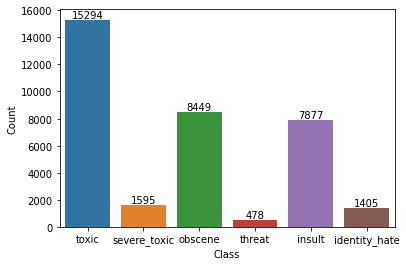

In [92]:
ax = sns.barplot(x="Class", y="Count", data=counts)
ax.bar_label(ax.containers[0])

In [48]:
val = 0
print(data[(data['toxic']==val) & (data['severe_toxic']==val) & (data['obscene']==val) & (data['threat']==val) & (data['insult']==val) & (data['identity_hate']==val)].shape, round((143346)/159571, 3))
val = 1
print(data[(data['toxic']==val) & (data['severe_toxic']==val) & (data['obscene']==val) & (data['threat']==val) & (data['insult']==val) & (data['identity_hate']==val)].shape)

(143346, 8) 0.898
(31, 8)


In [111]:
##let's look at the comments now
data["num_tokens"] = data['comment_text'].apply(lambda x: len(x.split()))

In [112]:
min(data['num_tokens']), max(data['num_tokens']), np.mean(data['num_tokens']), np.median(data['num_tokens'])

(1, 1411, 67.27352714465661, 36.0)

[Text(0, 0, '141929'),
 Text(0, 0, '12338'),
 Text(0, 0, '2563'),
 Text(0, 0, '1120'),
 Text(0, 0, '827'),
 Text(0, 0, '633'),
 Text(0, 0, '122'),
 Text(0, 0, '23'),
 Text(0, 0, '12'),
 Text(0, 0, '4')]

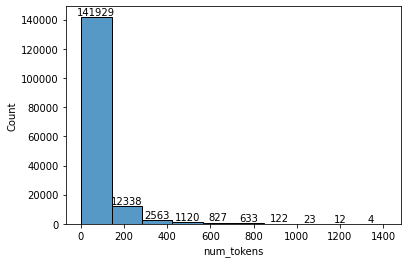

In [113]:
##Distribution of tokens
plt = sns.histplot(data['num_tokens'], bins=10)
plt.bar_label(plt.containers[0])

In [115]:
##converting to lower case
data['comment_text'] = data['comment_text'].str.lower()

In [151]:
##text processing: removing the numbers, special characters, whitespaces, trailing lines
def process(txt):
    txt = re.sub('[0-9]', '', txt)
    txt = re.sub('\n', '', txt)
    txt = re.sub('[().]', '', txt)
    txt = re.sub('[\\]', '', txt)
    txt = txt.strip()
    return txt

In [145]:
data["comment_text"] = data["comment_text"].apply(lambda x: process(x))

In [152]:
process("Hey \how")

error: unterminated character set at position 0